# **Проект: «Анализ факторов, влияющих на отток клиентов банка, и построение модели прогнозирования»**

### Описание проекта
Цель данного проекта — выявление ключевых факторов, влияющих на отток клиентов банка, и построение модели машинного обучения для прогнозирования вероятности ухода клиента. В ходе работы будет проведён комплексный анализ данных, включая их очистку, исследовательский анализ (EDA), проверку гипотез, сегментацию клиентов и формулирование рекомендаций для бизнеса. Результаты могут быть использованы для разработки персонализированных стратегий удержания клиентов и повышения их лояльности.

### Данные и их описание
Исходный набор данных содержит информацию о 4000+ клиентах банка, представленных в виде **10 признаков**. Основные характеристики включают демографические данные (возраст, пол, город), финансовые показатели (баланс, предполагаемый уровень заработной платы), активность клиентов и количество используемых продуктов банка. Целевой признак — **отток клиента**, принимающий значения:  
- **1** — клиент ушёл из банка.  
- **0** — клиент остался.

#### Основные признаки набора данных:
1. **USERID** — уникальный идентификатор клиента.  
2. **Score** — балльная оценка клиента.  
3. **City** — город обслуживания клиента.  
4. **Gender** — пол клиента (мужской/женский).  
5. **Age** — возраст клиента.  
6. **Equity** — наличие собственности (1 — есть, 0 — нет).  
7. **Balance** — баланс на счёте клиента.  
8. **Products** — количество продуктов банка, используемых клиентом.  
9. **Credit Card** — наличие кредитной карты (1 — есть, 0 — нет).  
10. **Last Activity** — активность клиента за последний месяц (1 — активен, 0 — неактивен).  
11. **EST_SALARY** — предполагаемый уровень заработной платы.  
12. **Churn** — целевой признак, указывающий на отток (1 — клиент ушёл, 0 — клиент остался).


---

### Заключение
Проект представляет собой полный цикл анализа клиентских данных банка: от их предобработки и исследовательского анализа до построения модели машинного обучения и формирования бизнес-рекомендаций. Полученные результаты могут быть использованы для разработки более эффективных стратегий удержания клиентов и повышения их лояльности.

# Загрузка и описание данных

In [ ]:
# импортируем набор библиотек для работы
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.express as px
from plotly import graph_objects as go
import math as mth
import numpy as np
import datetime as dt
import sys



!"{sys.executable}" -m pip install phik
import phik
from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
# Выгрузка данных и оценка первых 5 строк
data = pd.read_csv('bank_scrooge.csv')
data.head(5)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


1. **USERID**: Уникальный идентификатор клиента.
2. **score**: Оценка кредитного риска клиента.
3. **city**: Город проживания клиента.
4. **gender**: Пол клиента (М - мужчина, Ж - женщина).
5. **age**: Возраст клиента.
6. **equity**: Количество лет, на протяжении которых клиент пользуется банковскими продуктами.
7. **balance**: Баланс на счету клиента.
8. **products**: Количество продуктов, которые клиент использует в банке.
9. **credit_card**: Наличие кредитной карты у клиента (0 - нет, 1 - да).
10. **last_activity**: Признак активности клиента за последний месяц (0 - неактивен, 1 - активен).
11. **EST_SALARY**: Оценочная годовая зарплата клиента.
12. **churn**: Признак оттока клиента (0 - не ушел, 1 - ушел).

#### Описание переменных


- **USERID**: Числовой идентификатор, используется для уникальной идентификации клиентов.
- **score**: Числовое значение, отражающее кредитный риск клиента, чем выше, тем лучше.
- **city**: Строка, указывающая город проживания клиента.
- **gender**: Строка, обозначающая пол клиента, принимает значения "М" или "Ж".
- **age**: Числовое значение, возраст клиента в годах.
- **equity**: Числовое значение, количество лет, на протяжении которых клиент пользуется банковскими продуктами.
- **balance**: Числовое значение, текущий баланс на счету клиента. Может быть отсутствующим (NaN).
- **products**: Числовое значение, количество продуктов, которыми пользуется клиент.
- **credit_card**: Бинарное значение, наличие кредитной карты (0 - нет, 1 - да).
- **last_activity**: Бинарное значение, указывающее, был ли клиент активен в последний месяц (0 - неактивен, 1 - активен).
- **EST_SALARY**: Числовое значение, оценочная годовая зарплата клиента.
- **churn**: Бинарное значение, обозначающее отток клиента (0 - не ушел, 1 - ушел).


In [ ]:
data.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Получаем таблицу, которая представляет основные статистические характеристики данных для каждого признака в наборе данных клиентов:

1. **count**: Количество наблюдений (клиентов), имеющихся для каждого признака. Например, для возраста (age) есть 10000 наблюдений.

2. **mean**: Среднее значение признака. Например, средний возраст клиентов равен приблизительно 42.73 лет.

3. **std**: Стандартное отклонение признака, которое показывает разброс значений относительно их среднего. Например, стандартное отклонение баланса составляет примерно 1.98 миллиона рублей.

4. **min**: Минимальное значение признака. Например, минимальный возраст клиентов равен 18 годам.

5. **25%**, **50%**, **75%**: Квартили данных, которые представляют значения, разделяющие упорядоченный набор данных на четыре равные части. Например, 25% клиентов имеют возраст менее 33 лет, 50% - менее 40 лет, и так далее.

6. **max**: Максимальное значение признака. Например, максимальный баланс на счете клиента составляет около 119.1 миллиона рублей.


In [ ]:
data.isnull().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

In [ ]:
data['balance'].isnull().sum() / data.shape[0]*100

22.95

In [ ]:
data['age'].isnull().sum() / data.shape[0]*100

0.26

### **Итог**

Полученные результаты говорот о:

- В данных имеются пропуски в стобцах: `age` и `balance`
- Необходимо скорректировать наименования столбцов в один регистр для удобной работы
- В датасете присутствуют аномальные клиенты - без каких-либо банковских проектов

# Предобработка данных

In [ ]:
data.columns = data.columns.str.lower()
data = data.rename(columns = {'userid':'user_id'})
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [ ]:
prod = data.query('products == 0')
prod

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


In [ ]:
data = data.query('products != 0')
data.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


# Проверка дубликатов в датасете

In [ ]:
data.duplicated().sum()

0

In [ ]:
column_names = list(data.columns.values)
print(column_names)

['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


In [ ]:
data['user_id'].duplicated().sum()

73

Следовательно, что в датасете присутствует 73 дубликата по столбцу user_id

Перед удалением дублирующих данных - оценим их

In [ ]:
users = data[data['user_id'].duplicated()].head(10)
users

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,190253,726.0,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0
1837,210662,896.0,Рыбинск,Ж,37.0,0,NaN,2,0,0,90916.04,0
2138,131419,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2302,220816,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
2998,208081,821.0,Рыбинск,Ж,62.0,3,493608.26,2,1,1,33491.45,0
3039,170312,813.0,Рыбинск,Ж,47.0,3,370027.67,2,0,0,129835.56,0
3106,185748,912.0,Ярославль,Ж,47.0,5,1598218.98,2,0,0,180256.98,0
3817,211130,918.0,Рыбинск,Ж,55.0,0,NaN,2,1,1,244202.04,0


In [ ]:
# Получив дубликаты по user_id, необходимо оценить - есть ли люди, которые имеют одинаковый user_id в других городах
data.duplicated(subset=['user_id', 'city']).sum()

0

Итог - уникальный идентификатор люди могут получать из разных городов. То есть другими словами - это не дубликаты, а "неявные дубликаты", которые трогать не будем

# Проверка на пропуски в данных

In [ ]:
# вывод пропусков датасете
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2294
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Резюмируя в датасете имеются пропуски. Столбец `age` содерижит 0.26% пропусков, что по сути мало для 10000 строк датасета. С другой стороны столбец `balance`, который содержит 22.9% пропусков в данных, из этого следует более подробно изучить данные для понимания оттока клиентов, тк пропуски способны сильно повлиять на последующие действия.


In [ ]:
# оценка пропусков по столбца age
age = data.query('age.isna()')
age

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


In [ ]:
# Сколько кол-во отточных клиентов из пропущенных значений столбца age?
age_ = len((data[data['age'].isna()]).query('churn==1'))
age_

1

In [ ]:
# оценка пропусков по столбца balance
balance= data.query('balance.isna()')
balance

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9984,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9993,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


In [ ]:
# сделаем отдельный датасета, который будет содержать столбец булевого значения (0- пропуска нет, 1-значение пропущено)
bool_ = data.copy()
bool_['balance_bool'] = data['balance'].apply(lambda x: 1 if pd.isna(x) else 0)
bool_ = bool_.drop('balance', axis =1)
bool_

,user_id,score,city,gender,age,equity,products,credit_card,last_activity,est_salary,churn,balance_bool
0,183012,850.0,Рыбинск,Ж,25.0,1,2,0,1,75719.14,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,3,1,0,86621.77,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,1,1,1,107683.34,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,2,0,1,174423.53,1,0
4,157978,730.0,Ярославль,М,34.0,5,1,1,0,67353.16,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,1,0,1,18943.64,0,0
9996,139170,894.0,Ярославль,М,46.0,0,1,1,0,196898.29,0,1
9997,115639,903.0,Ярославль,М,24.0,0,2,1,1,108905.09,0,1
9998,148700,777.0,Ярославль,Ж,68.0,3,3,0,1,86874.90,0,0


In [ ]:
num_cols = list(bool_.dtypes[bool_.dtypes == float].index) + list(bool_.dtypes[bool_.dtypes == int].index)[1:-1]
num_cols

['score',
 'age',
 'est_salary',
 'equity',
 'products',
 'credit_card',
 'last_activity',
 'churn']

In [ ]:
# Количество отточных клиентов
churn = len(data.query('churn==1'))
churn

1819

На основании проведенных расчетов:

- Пропуски в столбце `age` составляют менее одного процента (0,26%) и являются MCAR (Missing Completely At Random - пропуски не зависят от других переменных и не приводят к систематической ошибке). В отток попадает только один клиент с пропуском в этом столбце, поэтому корректным решением будет удаление этих пропусков.

- Пропуски в столбце `balance` составляют 22,9% и относятся к категории MNAR (Missing Not At Random - пропуски зависят от данных, и без дополнительного обоснования их нельзя просто отбросить или заполнить одним значением). Эти пропуски некорректно заменять или удалять.

In [ ]:
data = data.dropna(subset=['age'])

### Вывод

- Отредактированы некорректные названия столбцов.
- Удален аномальный клиент, не имеющий ни одного банковского продукта.
- Явных и неявных дубликатов не обнаружено. Повторяющиеся `user_id` принадлежат разным людям в разных городах.
- Пропуски присутствуют в столбцах `age` и `balance`. Так как количество клиентов с оттоком в этих столбцах достаточно маленькое, решено оставить данные как есть, поскольку это не повлияет на анализ оттока клиентов.

# Исследовательский анализ данных (EDA)

In [ ]:
# просмотрим описательную статистику числовых данных
data[num_cols].describe().round(4)

,score,age,est_salary,equity,products,credit_card,last_activity,churn
count,9973.0000,9973.0000,9.973000e+03,9973.0000,9973.0000,9973.0000,9973.0000,9973.0000
mean,848.6712,42.7308,1.477991e+05,2.6308,1.8717,0.6802,0.5229,0.1823
std,65.3932,12.1752,1.392871e+05,1.9801,0.7925,0.4664,0.4995,0.3861
min,642.0000,18.0000,2.546300e+03,0.0000,1.0000,0.0000,0.0000,0.0000
25%,802.0000,33.0000,7.525202e+04,0.0000,1.0000,0.0000,0.0000,0.0000
50%,853.0000,40.0000,1.196431e+05,3.0000,2.0000,1.0000,1.0000,0.0000
75%,900.0000,51.0000,1.745000e+05,4.0000,2.0000,1.0000,1.0000,0.0000
max,1000.0000,86.0000,1.395064e+06,9.0000,5.0000,1.0000,1.0000,1.0000


### Основные наблюдения:

1. **Кредитные оценки (score)**: Вариативность кредитных оценок невелика (std = 65.39), большинство клиентов имеют высокие оценки (среднее значение - 848.67).
2. **Возраст (age)**: Средний возраст клиентов составляет около 43 лет, с диапазоном от 18 до 86 лет.
3. **Оценочная зарплата (est_salary)**: Зарплаты клиентов варьируются в широких пределах, средняя зарплата составляет около 147,799.
4. **Длительность пользования услугами (equity)**: В среднем клиенты пользуются услугами банка около 2.6 лет.
5. **Количество продуктов (products)**: Среднее количество продуктов, которыми пользуются клиенты, составляет 1.87, максимум - 5.
6. **Кредитные карты (credit_card)**: 68% клиентов имеют кредитные карты.
7. **Активность клиентов (last_activity)**: 52.29% клиентов были активны в последний месяц.
8. **Отток клиентов (churn)**: 18.23% клиентов покинули банк.


# Анализ распределения данных

Построим графики распределения оттока клиентов по непрерывным признакам. Их мы анализируем, чтобы найти интервалы признака, на которых отток выше, чем лояльность. Непрерывными в нашем датасете являются, но также для полной оценки воспользуемся оценкой и других данных, которые имеют числовое представление:

- score
- age
- balance
- est_salary

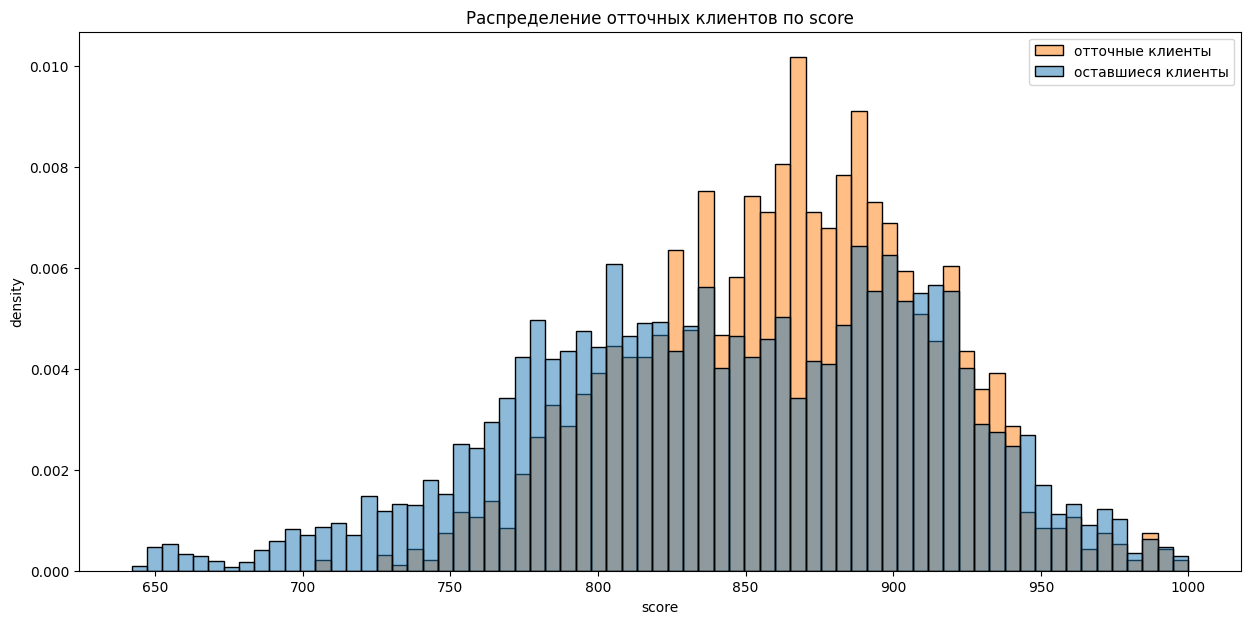

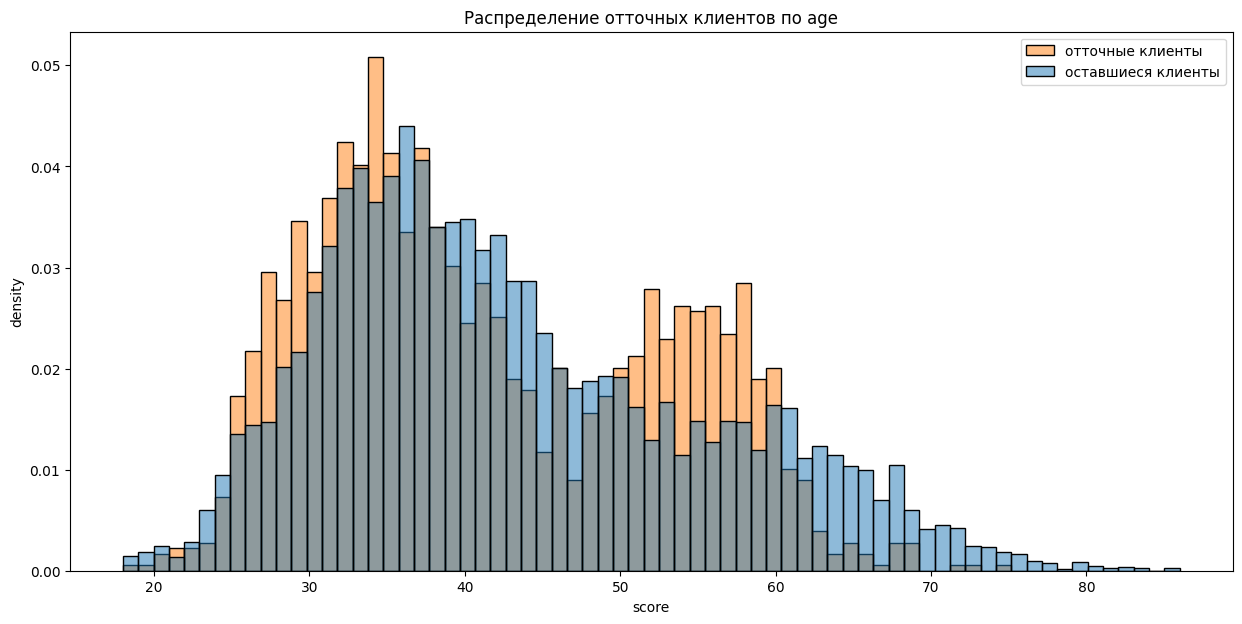

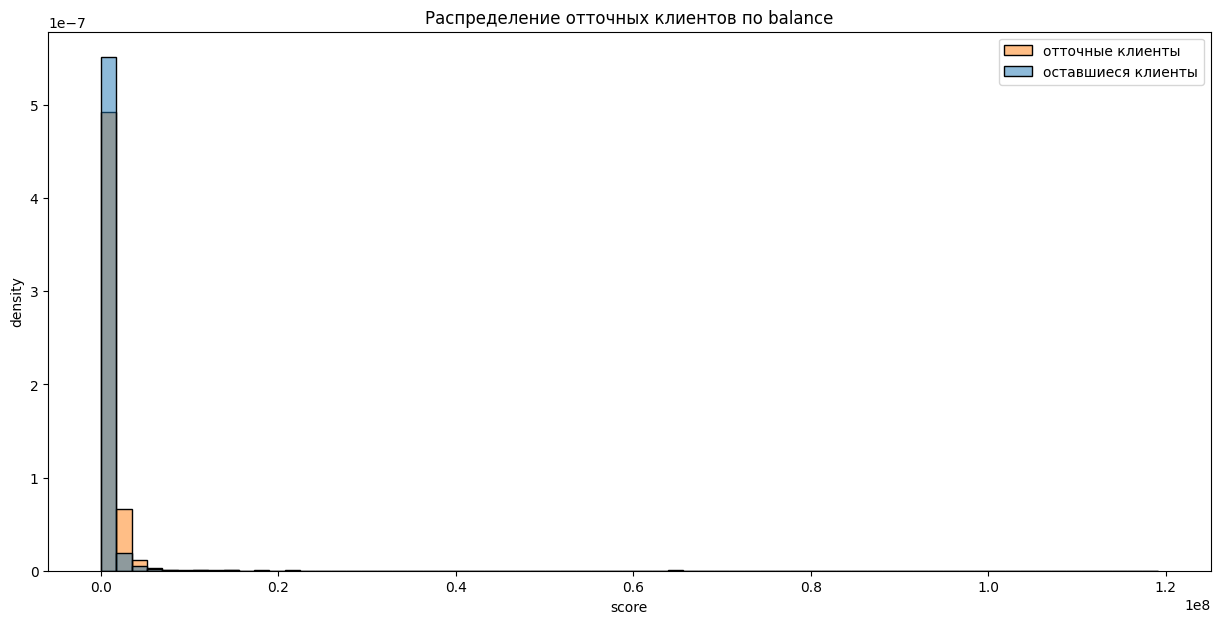

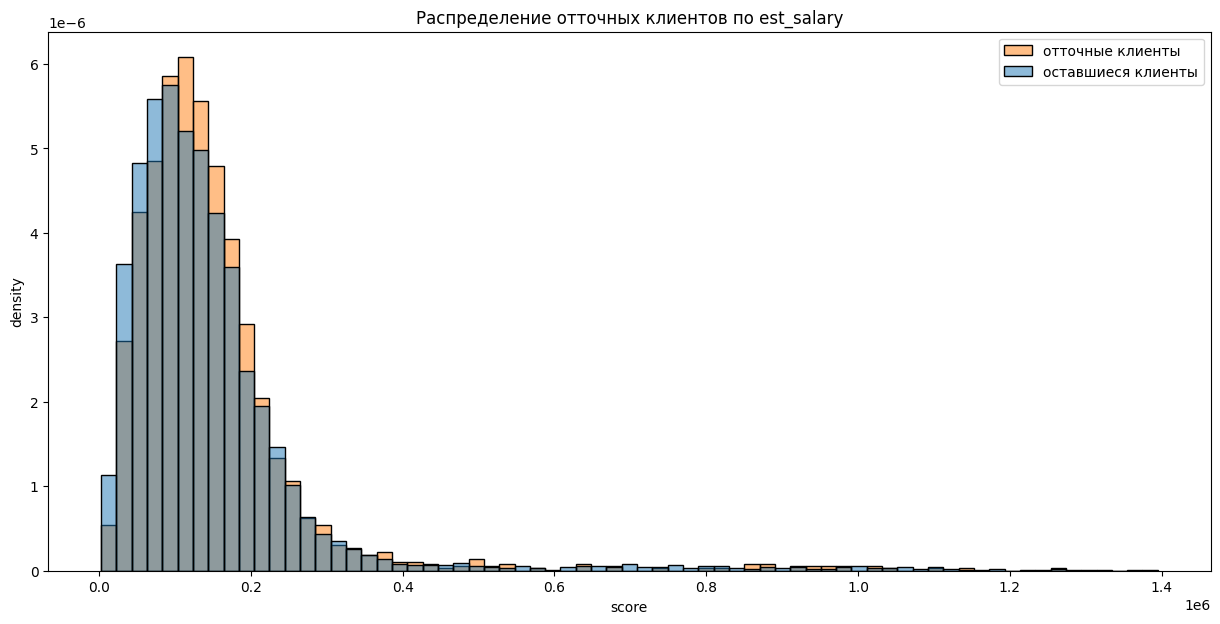

In [ ]:
# построим графики распределения по непрерывным признакам
for columns in ['score', 'age', 'balance', 'est_salary']:
    plt.figure(figsize=(15,7))

    sns.histplot(data=data,
                x=columns,
                 hue='churn',
                 bins=69,
                 stat="density",
                 common_norm=False,
                 color='green')

    plt.legend(['отточные клиенты', 'оставшиеся клиенты'])
    plt.title(f'Распределение отточных клиентов по {columns}')
    plt.xlabel('score')
    plt.ylabel('density')

### Вывод



- **Equity**:
  - Клиенты с нулевым `equity` имеют значительный риск оттока.
  - С увеличением `equity` до 2 лет количество оттока уменьшается.
  - При `equity` 4 года и выше, снова наблюдается значительный отток.

- **Products**:
  - Клиенты, использующие один продукт, более склонны оставаться в банке.
  - Наибольший отток наблюдается среди клиентов, использующих три и четыре продукта.
  
- **score**: Отток клиентов наблюдается в диапазонах 820-905 и 920-930.
- **age**: На основе возрастных значений можно выделить пять возрастных групп:
  - 18-24 года
  - 25-37 лет
  - 38-47 лет
  - 48-61 год
  - 62-86 лет
- **balance**: Требуется более детальный анализ другими методами.
- **est_salary**: Требуется более детальный анализ другими методами.

In [ ]:
# исследуем данные для более корректной оценки значений
data['balance'].describe().round(1)

count         7695.0
mean        827245.6
std        1980327.4
min              0.0
25%         295698.7
50%         524295.3
75%         980051.2
max      119113552.0
Name: balance, dtype: float64

In [ ]:
# График для оценки balance
fig = px.histogram(data.query('balance< 2000000'),
                   x='balance',
                   color='churn',
                   template='simple_white',
                   color_discrete_sequence=['red','blue'],
                   histnorm='probability',
                   barmode ='overlay'
                   )
fig.update_layout(title = 'Распределение средних рейтингов по balance')
fig.show()

На основе графика можно сделать вывод, что отток клиентов наблюдается при сумме на счете, превышающей 725 тысяч

In [ ]:
# построим график для оценки est_salary
fig = px.histogram(data.query('est_salary< 400000'), x='est_salary', color='churn',
                   template='simple_white',
                   color_discrete_sequence=['red','blue'],
                   histnorm='probability',
                   barmode ='overlay'
                   )
fig.update_layout(title = 'Распределение средних рейтингов по est_salary')
fig.show()

### Вывод

На основе графика наблюдается отток клиентов при зарплате свыше 100 тысяч.

#### Основные наблюдения:

- **score**: Отток клиентов наблюдается в диапазонах значений 820-905 и 920-930.
- **age**: Выделяются пять возрастных групп:
  - 18-24 года
  - 25-37 лет
  - 38-47 лет
  - 48-61 год
  - 62-86 лет
- **balance**: Отток клиентов наблюдается при сумме на счете более 725 тысяч.
- **est_salary**: Отток клиентов наблюдается при зарплате свыше 100 тысяч.

#### Дискретные признаки

Построим графики распределения оттока клиентов по дискретным признакам, чтобы понять, какие значения категориальных признаков более склонны к оттоку. Дискретными признаками в нашем датасете являются:

- city
- gender
- equity
- products
- credit_card
- last_activity

#### city

In [ ]:
city =data.pivot_table(index='city',
                           values='churn',
                           aggfunc=['sum', 'count']).reset_index()
city.columns = city.columns.droplevel(level=1)
city['share']=round(city['sum']/city['count'],2)
city = city.rename(columns={'sum':'churn'})
city

,city,churn,count,share
0,Ростов,265,1416,0.19
1,Рыбинск,436,2682,0.16
2,Ярославль,1117,5875,0.19


**Вычисление доли (`share`)**:
   - Создает новый столбец `share`, который представляет собой отношение суммы `churn` к количеству записей (`count`) для каждого города.
   - Значения округляются до двух знаков после запятой.

**Выводы**:

- В Ростове 19% клиентов покинули банк (265 из 1416).
- В Рыбинске 16% клиентов покинули банк (436 из 2682).
- В Ярославле 19% клиентов покинули банк (1117 из 5875).



Перейдём к построению графика доли отточных клиентов

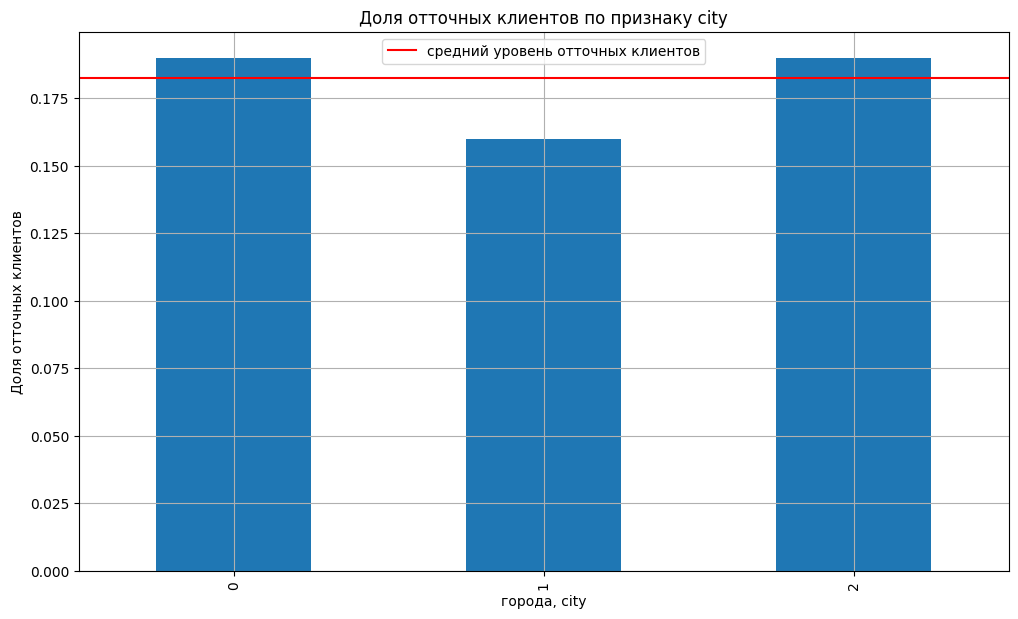

In [ ]:
city['share'].plot.bar(figsize = [12,7])
plt.title('Доля отточных клиентов по признаку city')
plt.xlabel('города, city')
plt.ylabel('Доля отточных клиентов')
plt.axhline(data.churn.mean(),c='red')
plt.legend(labels=['средний уровень отточных клиентов'])
plt.grid()
plt.show()

Вывод:

1. В городах 0 и 2 доля отточных клиентов выше среднего уровня.
2. В городе 1 доля отточных клиентов ниже среднего уровня.

Таким образом, города 0 и 2 требуют большего внимания для уменьшения оттока клиентов.

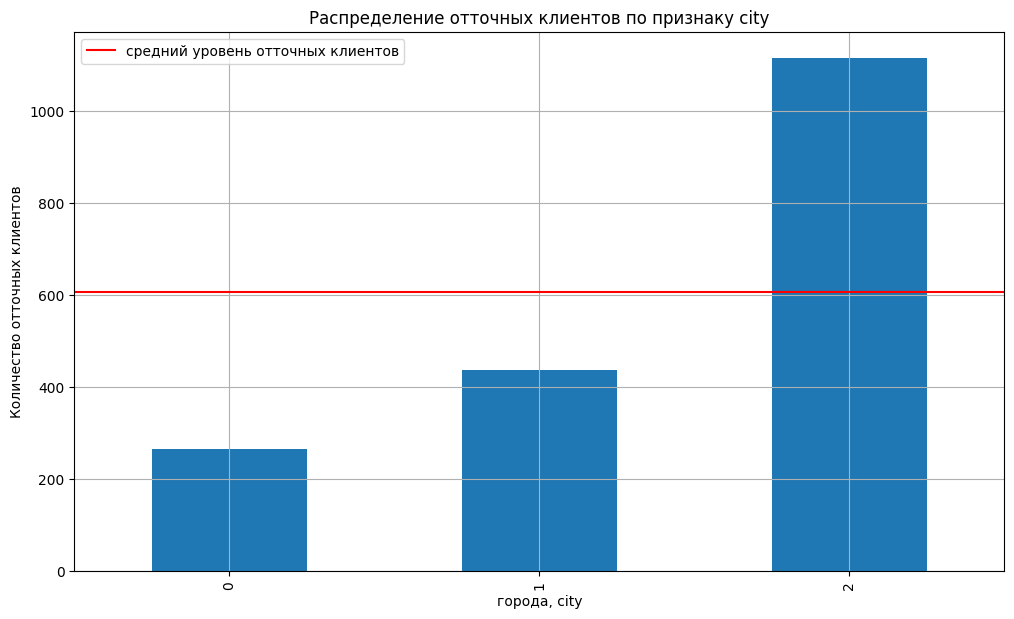

In [ ]:
# Необходимо построить график по абсолютному значению city
city['churn'].plot.bar(figsize = [12,7])
plt.title('Распределение отточных клиентов по признаку city')
plt.xlabel('города, city')
plt.ylabel('Количество отточных клиентов')
plt.axhline(data_city.churn.mean(),c='red')
plt.legend(labels=['средний уровень отточных клиентов'])
plt.grid()
plt.show()

Вывод:

1. В городе 2 количество отточных клиентов значительно выше среднего уровня.
2. В городе 1 количество отточных клиентов близко к среднему уровню.
3. В городе 0 количество отточных клиентов ниже среднего уровня.

Таким образом, город 2 имеет наиболее значительный отток клиентов и требует наибольшего внимания для анализа и принятия мер по его снижению.

#### gender

In [ ]:
# определим долю по полу
gender  =data.pivot_table(index='gender',
                             values='churn',
                             aggfunc=['sum', 'count']).reset_index()

gender.columns = gender.columns.droplevel(level=1)

gender['share'] = round(gender['sum']/gender['count'],2)
gender = gender.rename(columns={'sum':'churn'})
gender

,gender,churn,count,share
0,Ж,635,4982,0.13
1,М,1183,4991,0.24


На основе результирующей таблицы можно сделать следующие выводы:

1. **Женщины (Ж)**
   - Количество отточных клиентов: 635
   - Общее количество клиентов: 4982
   - Доля отточных клиентов: 13%

2. **Мужчины (М)**
   - Количество отточных клиентов: 1183
   - Общее количество клиентов: 4991
   - Доля отточных клиентов: 20%

Вывод:
- Доля отточных клиентов среди мужчин (20%) выше, чем среди женщин (13%).
- Количество отточных клиентов также больше среди мужчин (1183) по сравнению с женщинами (635), несмотря на почти равное общее количество клиентов в обеих группах.

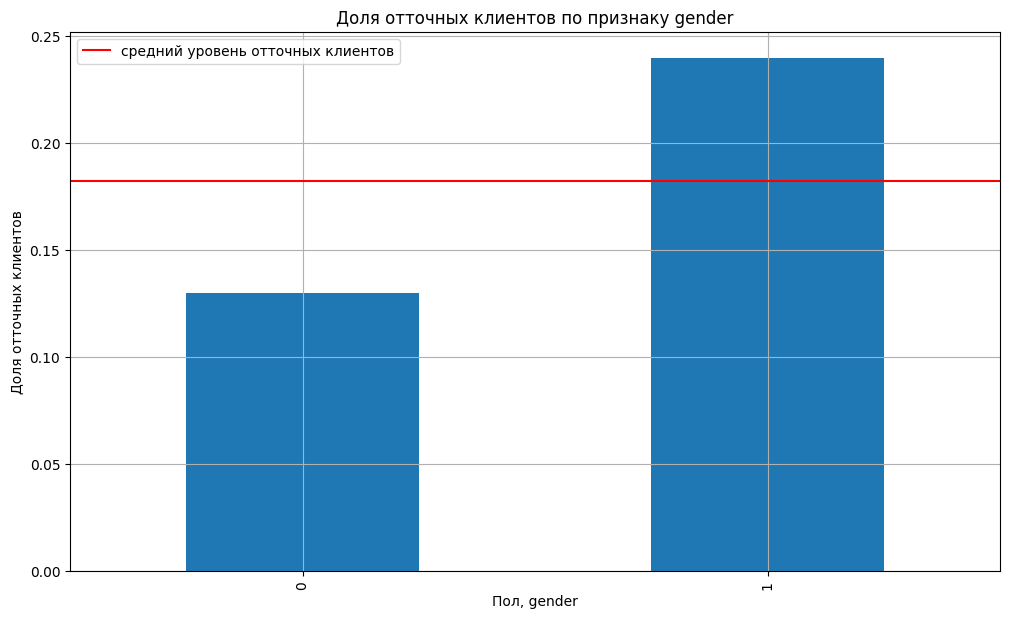

In [ ]:
# построим график по доли отточных клиентов по полам
gender['share'].plot.bar(figsize = [12,7])
plt.title('Доля отточных клиентов по признаку gender')
plt.xlabel('Пол, gender')
plt.ylabel('Доля отточных клиентов')
plt.axhline(data.churn.mean(),c='red')
plt.legend(labels=['средний уровень отточных клиентов'])
plt.grid()
plt.show()

График показывает долю отточных клиентов по полу (gender). На оси X указаны пол (0 - женщины, 1 - мужчины), а на оси Y - доля отточных клиентов. Красная горизонтальная линия обозначает средний уровень отточных клиентов по всем клиентам.

Вывод:
1. Доля отточных клиентов среди мужчин (0.20) выше среднего уровня.
2. Доля отточных клиентов среди женщин (0.13) ниже среднего уровня.

Таким образом, мужчины имеют более высокий уровень оттока клиентов по сравнению с женщинами.

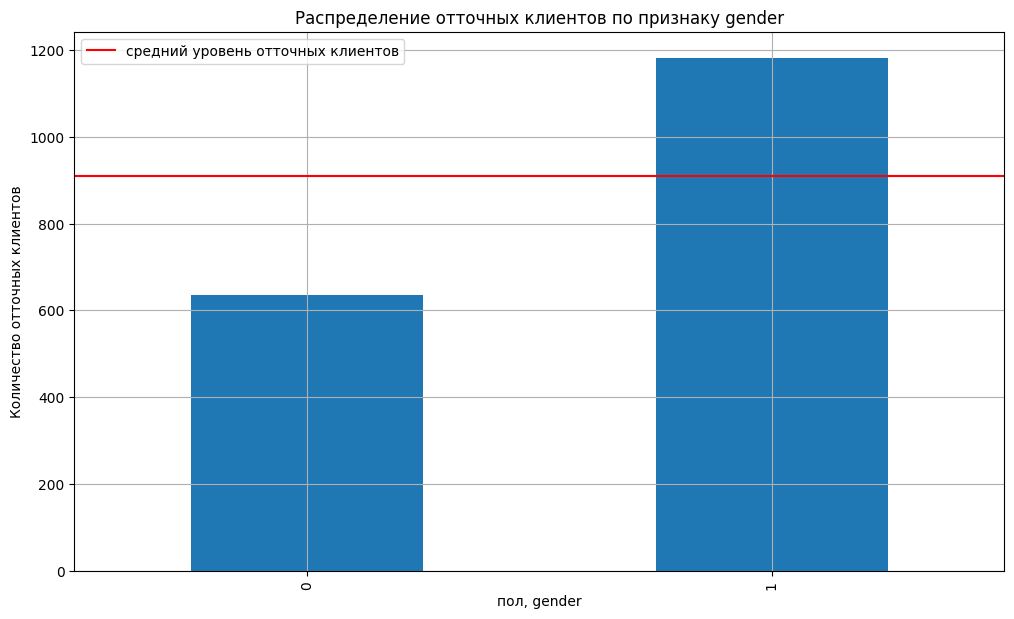

In [ ]:
# по абсолютному значению gender
gender['churn'].plot.bar(figsize = [12,7])
plt.title('Распределение отточных клиентов по признаку gender')
plt.xlabel('пол, gender')
plt.ylabel('Количество отточных клиентов')
plt.axhline(gender.churn.mean(),c='red')
plt.legend(labels=['средний уровень отточных клиентов'])
plt.grid()
plt.show()

По графику видно, что среди клиентов мужского пола больше отточных клиентов, чем среди клиентов женского пола.

#### equity

Определим долю по баллам собственности

In [ ]:
equity = data.pivot_table(index='equity',
                          values='churn',
                          aggfunc=['sum', 'count']).reset_index()

equity.columns = equity.columns.droplevel(level=1)

equity['share']=round(equity['sum']/equity['count'],2)
equity = equity.rename(columns={'sum':'churn'})
equity

,equity,churn,count,share
0,0,90,2576,0.03
1,1,93,773,0.12
2,2,166,1051,0.16
3,3,321,1540,0.21
4,4,464,1847,0.25
5,5,576,1915,0.30
6,6,58,161,0.36
7,7,37,80,0.46
8,8,6,17,0.35
9,9,7,13,0.54


Таблица показывает распределение отточных клиентов в зависимости от значения признака `equity`. В таблице представлены следующие столбцы:
- `equity`: значение признака `equity`.
- `churn`: количество отточных клиентов.
- `count`: общее количество клиентов для данного значения `equity`.
- `share`: доля отточных клиентов для данного значения `equity`.

Выводы из таблицы:
1. **Малые значения equity (0-1)**
   - Низкая доля отточных клиентов: 0.03 и 0.12 соответственно.

2. **Средние значения equity (2-5)**
   - Умеренная доля отточных клиентов: увеличивается с 0.16 до 0.30.

3. **Высокие значения equity (6-9)**
   - Высокая доля отточных клиентов: от 0.36 до 0.54, что значительно выше по сравнению с малыми и средними значениями equity.

Заключение:
- Наблюдается тенденция увеличения доли отточных клиентов с ростом значения equity.
- Особенно высокий уровень оттока клиентов наблюдается при значениях equity от 6 и выше.

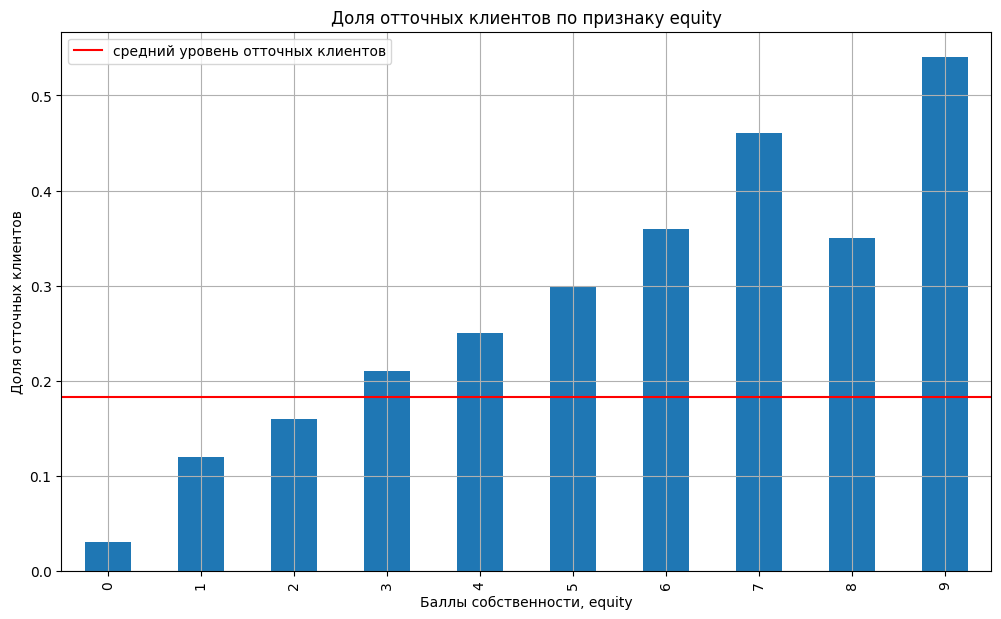

In [ ]:
# построим график по доли отточных клиентов
equity['share'].plot.bar(figsize = [12,7])
plt.title('Доля отточных клиентов по признаку equity')
plt.xlabel('Баллы собственности, equity')
plt.ylabel('Доля отточных клиентов')
plt.axhline(data.churn.mean(),c='red')
plt.legend(labels=['средний уровень отточных клиентов'])
plt.grid()
plt.show()

График демонстрирует закономерность: чем больше баллов собственности (за исключением значения 8), тем выше доля отточных клиентов. Клиенты с баллами собственности 3 и выше более подвержены оттоку. Однако, по абсолютным значениям видно, что количество отточных клиентов с баллами собственности от 6 до 9 не достигает среднего уровня отточных клиентов.

#### products

In [ ]:
# определим долю по баллам собственности
products = data.pivot_table(index='products',
                            values='churn',
                            aggfunc=['sum', 'count'])

products.columns = products.columns.droplevel(level=1)

products['share'] = round(products['sum']/products['count'],2)
products=products.rename(columns={'sum':'churn'})
products

,churn,count,share
products,,,
1,235,3323,0.07
2,978,5119,0.19
3,297,1038,0.29
4,300,474,0.63
5,8,19,0.42



Выводы из полученной таблицы:
1. **1 продукт**
   - Низкая доля отточных клиентов: 0.07.
   
2. **2 продукта**
   - Умеренная доля отточных клиентов: 0.19.
   
3. **3 продукта**
   - Повышенная доля отточных клиентов: 0.29.
   
4. **4 продукта**
   - Высокая доля отточных клиентов: 0.63.
   
5. **5 продуктов**
   - Доля отточных клиентов: 0.42 (значительно варьируется из-за малого количества клиентов).

Заключение:
- Наблюдается тенденция увеличения доли отточных клиентов с ростом количества продуктов.
- Особенно высокий уровень оттока клиентов наблюдается при количестве продуктов 4 и выше.

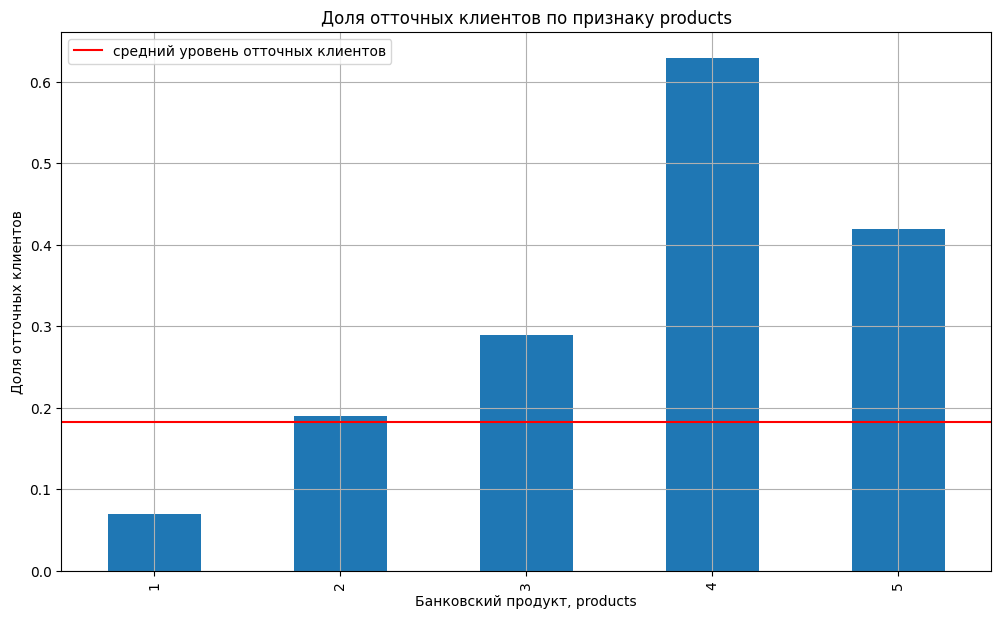

In [ ]:
# построим график по доли отточных клиентов
products['share'].plot.bar(figsize = [12,7])
plt.title('Доля отточных клиентов по признаку products')
plt.xlabel('Банковский продукт, products')
plt.ylabel('Доля отточных клиентов')
plt.axhline(data.churn.mean(), c = 'red')
plt.legend(labels=['средний уровень отточных клиентов'])
plt.grid()
plt.show()

На графике видно, что:

- Продукт 1 имеет самую низкую долю оттока клиентов.
- Продукт 4 имеет самую высокую долю оттока клиентов.
- Продукты 2, 3 и 5 имеют доли оттока выше среднего уровня оттока (красная линия).

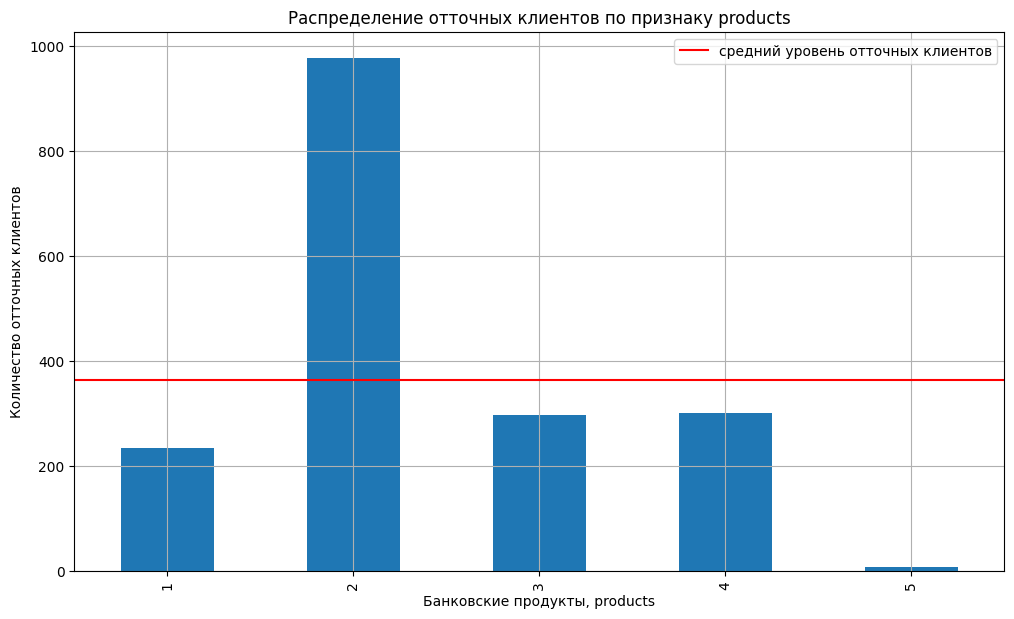

In [ ]:
# построим график по абсолютному значению products
products['churn'].plot.bar(figsize = [12,7])
plt.title('Распределение отточных клиентов по признаку products')
plt.xlabel('Банковские продукты, products')
plt.ylabel('Количество отточных клиентов')
plt.axhline(products.churn.mean(),c='red')
plt.legend(labels=['средний уровень отточных клиентов'])
plt.grid()
plt.show()


На графике видно, что продукт 2 имеет наибольшее количество оттоков клиентов, значительно превышающее средний уровень (красная линия). Продукт 5 имеет наименьшее количество оттоков.

#### credit_card

In [ ]:
# доля по баллам собственности
credit_card = data.pivot_table(index='credit_card',
                               values='churn',
                               aggfunc=['sum', 'count']).reset_index()

credit_card.columns = credit_card.columns.droplevel(level=1)

credit_card['share']=round(credit_card['sum']/credit_card['count'],2)
credit_card = credit_card.rename(columns={'sum':'churn'})
credit_card

,credit_card,churn,count,share
0,0,815,3189,0.26
1,1,1003,6784,0.15




- Клиенты без кредитной карты (0):
  - Ушли: 815
  - Всего: 3189
  - Доля оттока: 26%
  
- Клиенты с кредитной картой (1):
  - Ушли: 1003
  - Всего: 6784
  - Доля оттока: 15%

Клиенты без кредитной карты имеют более высокую долю оттока (26%) по сравнению с клиентами с кредитной картой (15%).

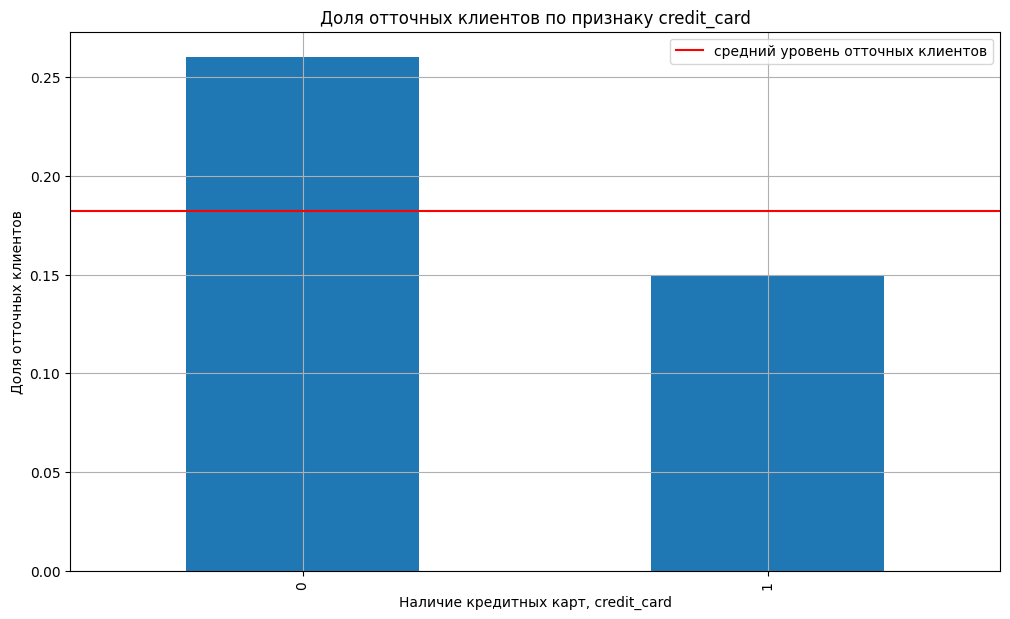

In [ ]:
# график по доли отточных клиентов
credit_card['share'].plot.bar(figsize = [12,7])
plt.title('Доля отточных клиентов по признаку credit_card')
plt.xlabel('Наличие кредитных карт, credit_card')
plt.ylabel('Доля отточных клиентов')
plt.axhline(data.churn.mean(),c='red')
plt.legend(labels=['средний уровень отточных клиентов'])
plt.grid()
plt.show()

График показывает долю оттока клиентов в зависимости от наличия кредитной карты:

- Клиенты без кредитной карты (0) имеют долю оттока около 26%, что выше среднего уровня оттока.
- Клиенты с кредитной картой (1) имеют долю оттока около 15%, что ниже среднего уровня оттока.

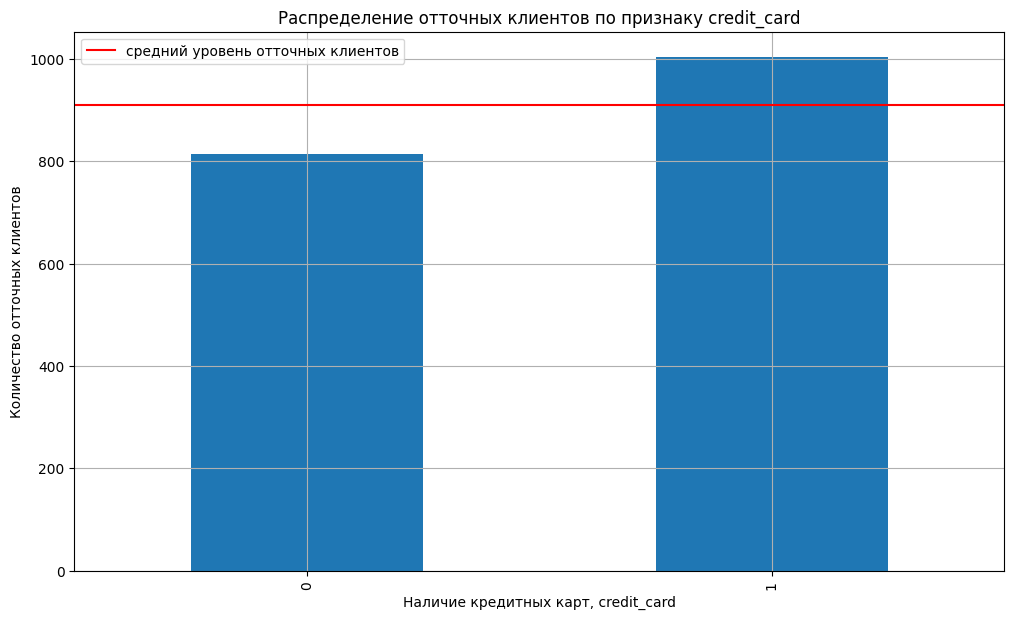

In [ ]:
# график по абсолютному значению credit_card
data_credit_card['churn'].plot.bar(figsize = [12,7])
plt.title('Распределение отточных клиентов по признаку credit_card')
plt.xlabel('Наличие кредитных карт, credit_card')
plt.ylabel('Количество отточных клиентов')
plt.axhline(data_credit_card.churn.mean(),c='red')
plt.legend(labels=['средний уровень отточных клиентов'])
plt.grid()
plt.show()

Доля клиентов без кредитной карты выше среднего уровня оттока, в отличие от клиентов с кредитной картой. Однако в абсолютных числах оттока клиентов ситуация противоположная.

#### last_activity

In [ ]:
# поределим долю по активности клиента
last_activity = data.pivot_table(index='last_activity',
                                 values='churn',
                                 aggfunc=['sum', 'count']).reset_index()

last_activity.columns = last_activity.columns.droplevel(level=1)

last_activity['share'] = round(last_activity['sum']/last_activity['count'],2)
last_activity=last_activity.rename(columns={'sum':'churn'})
last_activity

,last_activity,churn,count,share
0,0,541,4758,0.11
1,1,1277,5215,0.24


Эта таблица показывает данные об оттоке клиентов в зависимости от их активности:

- **last_activity**: показатель активности клиента (0 - неактивные, 1 - активные).
- **churn**: количество клиентов, которые ушли.
- **count**: общее количество клиентов.
- **share**: доля оттока клиентов (отношение ушедших клиентов к общему числу клиентов).

Результаты:

- Неактивные клиенты (0):
  - Ушли: 541
  - Всего: 4758
  - Доля оттока: 11%
  
- Активные клиенты (1):
  - Ушли: 1277
  - Всего: 5215
  - Доля оттока: 24%

Активные клиенты имеют более высокую долю оттока (24%) по сравнению с неактивными клиентами (11%).

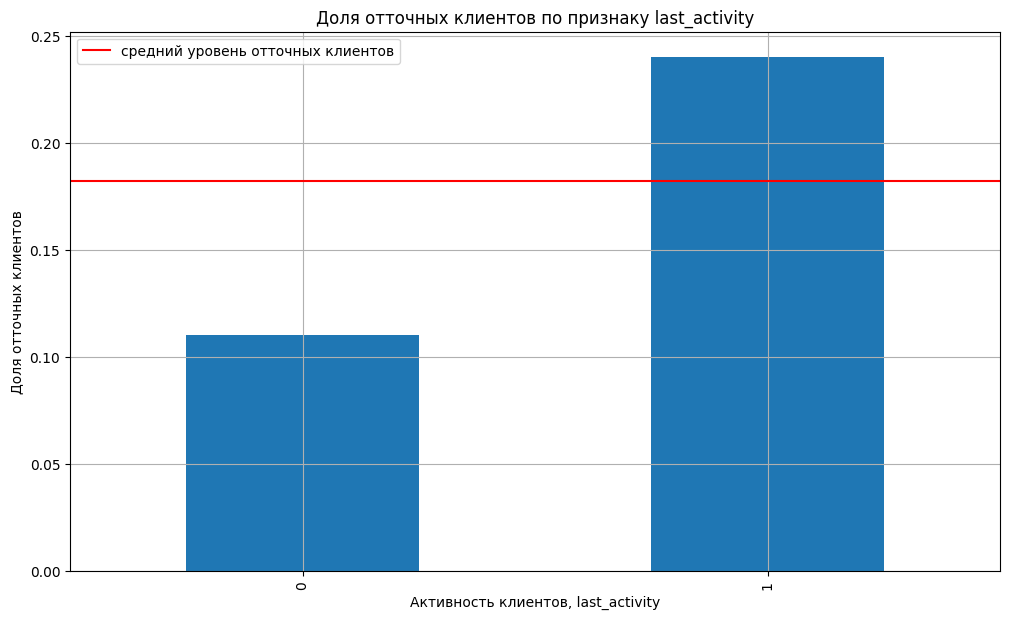

In [ ]:
# график по доли отточных клиентов
last_activity['share'].plot.bar(figsize = [12,7])
plt.title('Доля отточных клиентов по признаку last_activity')
plt.xlabel('Активность клиентов, last_activity')
plt.ylabel('Доля отточных клиентов')
plt.axhline(data.churn.mean(),c='red')
plt.legend(labels=['средний уровень отточных клиентов'])
plt.grid()
plt.show()

На графике показана доля оттока клиентов в зависимости от их последней активности (last_activity). Синяя колонка "0" обозначает долю оттока неактивных клиентов, а "1" — активных. Красная горизонтальная линия указывает на средний уровень оттока клиентов. Видно, что активные клиенты имеют более высокий уровень оттока по сравнению со средним значением.

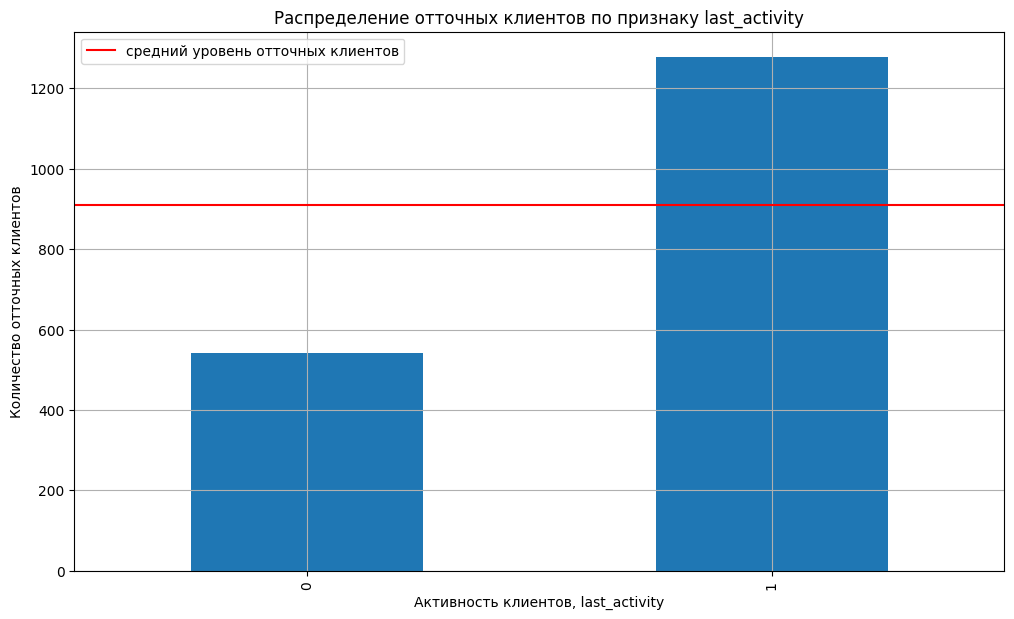

In [ ]:
# построим график по абсолютному значению last_activity
last_activity['churn'].plot.bar(figsize = [12,7])
plt.title('Распределение отточных клиентов по признаку last_activity')
plt.xlabel('Активность клиентов, last_activity')
plt.ylabel('Количество отточных клиентов')
plt.axhline(last_activity.churn.mean(),c='red')
plt.legend(labels=['средний уровень отточных клиентов'])
plt.grid()
plt.show()

График демонстрирует, что активные клиенты уходят чаще.

Вывод:

- `city` - В городах Ростов и Ярославль доля отточных клиентов превышает средний уровень по банку.
- `gender`` - Среди клиентов мужского пола (24%) больше отточных клиентов, чем среди клиентов женского пола (13%).
- `equity` - Клиенты с баллами собственности 3 и более чаще подвержены оттоку. По распределению отточных клиентов в абсолютных значениях видно, что баллы собственности со значениями от 6 до 9 не достигают среднего уровня отточных клиентов.
- `products` - Все продукты, кроме первого, превышают средний уровень отточных клиентов. Особенно высока доля у продукта 4. Однако, опираясь на общее количество отточных клиентов, только второй продукт превышает средний уровень.
- `credit_card` - Доля клиентов без кредитной карты (26%) превышает средний уровень отточных клиентов, в отличие от клиентов, имеющих кредитную карту (15%).
- `last_activity` - Активные клиенты уходят чаще.

In [ ]:
bool_[num_cols].corr()

,score,age,est_salary,equity,products,credit_card,last_activity,churn
score,1.000000,-0.012339,0.164049,0.064103,-0.003708,-0.094503,-0.031004,0.105634
age,-0.012339,1.000000,-0.039354,0.020581,0.017900,-0.122761,-0.007849,-0.050463
est_salary,0.164049,-0.039354,1.000000,-0.171965,-0.118299,0.035432,0.002947,0.001460
equity,0.064103,0.020581,-0.171965,1.000000,0.432235,-0.167497,-0.001950,0.270581
products,-0.003708,0.017900,-0.118299,0.432235,1.000000,-0.251831,0.036905,0.301616
credit_card,-0.094503,-0.122761,0.035432,-0.167497,-0.251831,1.000000,-0.033603,-0.130524
last_activity,-0.031004,-0.007849,0.002947,-0.001950,0.036905,-0.033603,1.000000,0.169037
churn,0.105634,-0.050463,0.001460,0.270581,0.301616,-0.130524,0.169037,1.000000


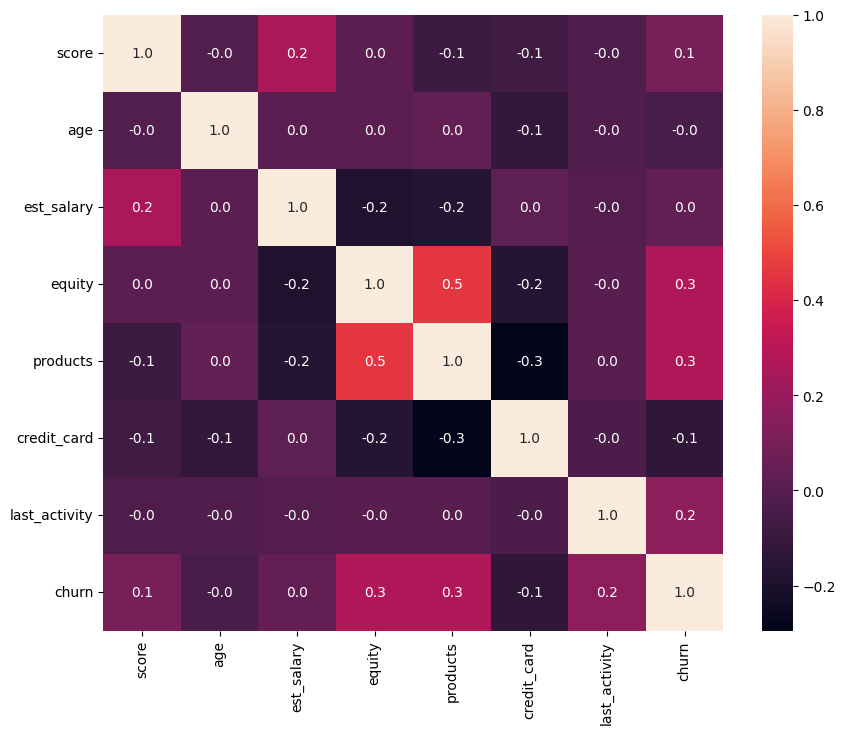

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(bool_[num_cols]
            .corr(method='spearman'),
            annot=True, fmt=".1f");

Можно выделить несколько ключевых моментов:

1. **equity и products**: Самая сильная положительная корреляция (+0.5). Это означает, что клиенты, которые дольше пользуются услугами банка (equity), склонны использовать больше банковских продуктов.

2. **churn и equity/products**: Значительная положительная корреляция (по +0.3). Это указывает на то, что клиенты, имеющие больше продуктов и более длительное сотрудничество с банком, имеют повышенный риск оттока (churn).

3. **credit_card и products**: Отрицательная корреляция (-0.3). Клиенты с кредитными картами менее склонны использовать другие продукты банка.

4. **score и est_salary**: Умеренная положительная корреляция (+0.2). Клиенты с более высокими кредитными оценками (score) часто имеют более высокую оценочную зарплату (est_salary).

5. **last_activity и churn**: Положительная корреляция (+0.2). Клиенты, которые были активны в последний месяц, имеют больший риск оттока.

\

/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning:

The number of unique values of variable user_id is large: 9923. Are you sure this is not an interval variable? Analysis for pairs of variables including user_id can be slow.



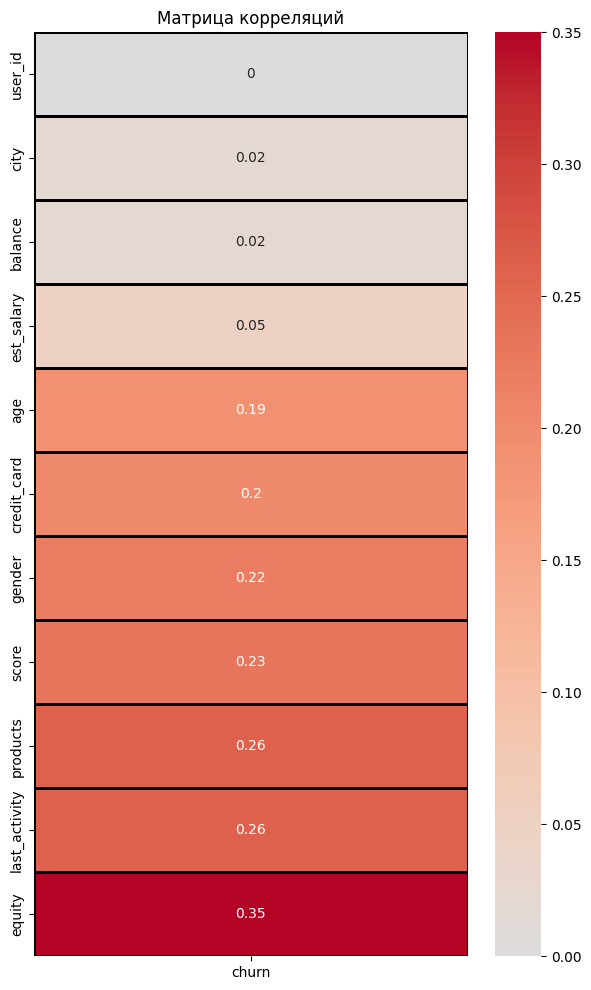

In [ ]:
plt.figure(figsize=(7, 12))
sns.heatmap((data.phik_matrix(interval_cols= ['score',
                                              'balance',
                                              'est_salary',
                                              'age']).round(2)).loc[:,['churn']].drop('churn').sort_values('churn'),
             annot=True,
             cmap='coolwarm',
            center=0,
            linecolor='black',
            linewidths=1)

plt.title('Матрица корреляций')
plt.show()

Корреляция по шкале Чеддока:

- 0,1 - 0,3: Слабая
- 0,3 - 0,5: Умеренная
- 0,5 - 0,7: Заметная
- 0,7 - 0,9: Высокая
- 0,9 - 0,99: Весьма высокая

**Корреляции:**
- **equity** - умеренная корреляция
- **last_activity**, **products**, **score**, **gender**, **credit_card**, **age** - слабая корреляция

**Вывод:**

Исходя из матрицы корреляций и судя по шкале Чеддока, можно сделать следующие выводы:

- Высоких зависимостей между признаками не выявлено. Самая высокая корреляция наблюдается между **products** и **equity** - 0,58, что можно считать заметной зависимостью.
- Умеренная зависимость наблюдается между **score** и **products**, **balance** и **est_salary**, **age** и **est_salary**, **churn** и **equity**.
- Касательно признака оттока (churn), наблюдается умеренная корреляция с такими параметрами, как **equity** (0,35), **last_activity** (0,26), **products** (0,26), **score** (0,23), **gender** (0,22), **credit_card** (0,2) и **age** (0,19).

### Портрет клиента

Для начала построим таблицу в разрезе оттока, где по каждому признаку будет посчитана мера центральной тенденции. Для сравнения мер центральной тенденции между собой посчитаем относительную разницу между ними.

Для непрерывных/дискретных переменных посчитаем среднее значение - оно лучше всего интерпретируется бизнесом. Также в дополнение к среднему посчитаем медиану, чтобы понимать, в какой сторону смещено распределение, в случае если у непрерывной величины есть выбросы.

In [ ]:
# построим таблицу в разрезе оттока для значений 'score', 'age', 'balance', 'est_salary'
dis = data.pivot_table(index = 'churn',
                            values = ['score', 'age', 'balance', 'est_salary'],
                            aggfunc = {'score':['mean', 'median'],
                                       'age':['mean', 'median'],
                                       'balance':['mean', 'median'],
                                       'est_salary':['mean', 'median']}
                           )
dis = dis.T
dis['per'] = (dis[0] - dis[1]) / dis[0] * 100
dis.round(2)

churn                      0           1    per
age        mean        43.02       41.43   3.70
           median      40.00       39.00   2.50
balance    mean    733031.63  1134458.21 -54.76
           median  475410.09   783908.90 -64.89
est_salary mean    147674.64   148357.48  -0.46
           median  118227.60   125408.88  -6.07
score      mean       845.40      863.36  -2.13
           median     848.00      866.00  -2.12

Таблица показывает средние и медианные значения для параметров 'score', 'age', 'balance' и 'est_salary' в разрезе оттока клиентов (churn). Колонка 'per' отображает процентное изменение между клиентами, которые не ушли (0), и клиентами, которые ушли (1):

- **age**: Средний возраст оттоковых клиентов ниже на 3,70%, медианный возраст ниже на 2,50%.
- **balance**: Средний баланс у оттоковых клиентов выше на 54,76%, медианный баланс выше на 64,89%.
- **est_salary**: Средняя зарплата у оттоковых клиентов выше на 0,46%, медианная зарплата выше на 6,07%.
- **score**: Средний скоринговый балл у оттоковых клиентов выше на 2,13%, медианный скоринговый балл выше на 2,12%.

Процентное изменение показывает, насколько каждый параметр изменяется в зависимости от того, ушли клиенты или остались.

In [ ]:
# построим таблицу в разрезе оттока для значений 'products', 'equity'
med = data.pivot_table(index = 'churn',
                            values = ['products', 'equity'],
                            aggfunc = {'products':['median'], 'equity':['median']}
                           )
med = med.T
med

,churn,0,1
equity,median,3.0,4.0
products,median,2.0,2.0


Таблица показывает медианные значения для параметров 'products' и 'equity' в разрезе оттока клиентов (churn).

**Портреты клиентов:**

- **Оставшийся клиент (churn = 0):**
  - Медианное значение 'equity' (собственность) равно 3.
  - Медианное количество 'products' (продукты) равно 2.

- **Отточный клиент (churn = 1):**
  - Медианное значение 'equity' (собственность) равно 4.
  - Медианное количество 'products' (продукты) равно 2.

Клиенты, покидающие компанию, имеют более высокое медианное значение собственности (equity), тогда как медианное количество продуктов (products) одинаково для обеих групп.

## Потроение и проверка гипотез

Выдвинем две гипотезы:

**Гипотеза №1:** Существует различие в зарплате между клиентами, пользующимися двумя банковскими продуктами, и клиентами, пользующимися тремя банковскими продуктами. Из всех продуктов, превышающих средний уровень оттока клиентов, доля у продуктов 2 и 3 самая низкая. Однако, опираясь на общее количество оттоковых клиентов, только второй продукт превышает средний уровень, а третий продукт близок к этому уровню.

**Гипотеза №2:** Существует различие в заработной плате между оставшимися и оттоковыми клиентами.

Для проверки гипотез формулируются нулевая (H0) и альтернативная (H1) гипотезы, а также устанавливается уровень значимости. Уровень значимости примем за 5% (α = 0.05).

Чтобы определить, можно ли применять t-тест, необходимо проверить три условия:

1. **Генеральные совокупности должны быть независимы.** Если рассматривается одна генеральная совокупность до и после какого-либо изменения, следует использовать другой тест, который будет рассмотрен в следующем уроке.
2. **Выборочные средние должны быть нормально распределены.** Это условие не должно быть препятствием благодаря центральной предельной теореме. Если размер выборки составляет хотя бы несколько десятков значений, выборочные средние будут распределены близко к нормальному вокруг истинного среднего этой совокупности, даже если сама генеральная совокупность не распределена нормально.
3. **Дисперсии рассматриваемых генеральных совокупностей должны быть равны.** Это условие может быть сложно выполнить. Если выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные, указываем параметр equal_var=False и применяем t-тест.

**Проверка гипотезы №1:**

Сформулируем нулевую и альтернативную гипотезы:

- **Нулевая (H0):** Средняя зарплата клиентов, пользующихся двумя банковскими продуктами, и клиентов, пользующихся тремя продуктами, одинаковая.
- **Альтернативная (H1):** Средняя зарплата клиентов, пользующихся двумя банковскими продуктами, и клиентов, пользующихся тремя продуктами, различная.

In [ ]:
# проверим распределение

alpha = 0.05

results_1 = st.shapiro(data[data['products'] == 2]['est_salary'])
p_value_0 = results_1[1]

print('p-значение: ', p_value_0)

if p_value_0 < alpha:
    print('распределение не нормально')
else:
    print('распределение нормальное')

results_2 = st.shapiro(data[data['products'] == 3]['est_salary'])
p_value_1 = results_1[1]

print('p-значение: ', p_value_1)

if p_value_1 < alpha:
    print('распределение не нормально')
else:
    print('распределение нормальное')

p-значение:  0.0
распределение не нормально
p-значение:  0.0
распределение не нормально


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



Результаты проверки нормальности распределения для зарплат клиентов, пользующихся двумя и тремя банковскими продуктами, показывают, что распределение не нормальное:

- **p-значение для клиентов с двумя продуктами:** 0.0
- **p-значение для клиентов с тремя продуктами:** 0.0

Оба значения меньше уровня значимости 0.05, поэтому можно заключить, что распределение зарплат в обеих группах не является нормальным.

In [ ]:
# оценка дисперсии

print('Дисперсия клиентов с 2мя продуктами', data[data['products'] == 2]['est_salary'].var())
print('Дисперсия клиентов с 3мя продуктами', data[data['products'] == 3]['est_salary'].var())

Дисперсия клиентов с 2мя продуктами 13706928749.096079
Дисперсия клиентов с 3мя продуктами 14015653781.701866


Результаты оценки дисперсии для зарплат клиентов, пользующихся двумя и тремя банковскими продуктами, показывают следующие значения:

- **Дисперсия клиентов с двумя продуктами:** 13,706,928,749.10
- **Дисперсия клиентов с тремя продуктами:** 14,015,653,781.70

Дисперсии очень близки друг к другу, что указывает на схожесть в разбросе зарплат между этими двумя группами клиентов.

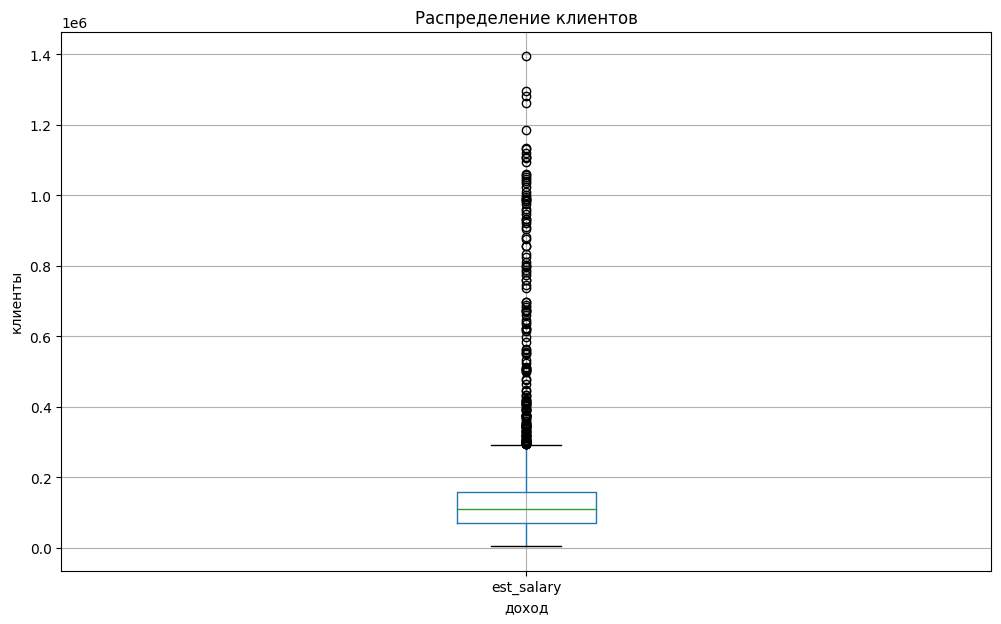

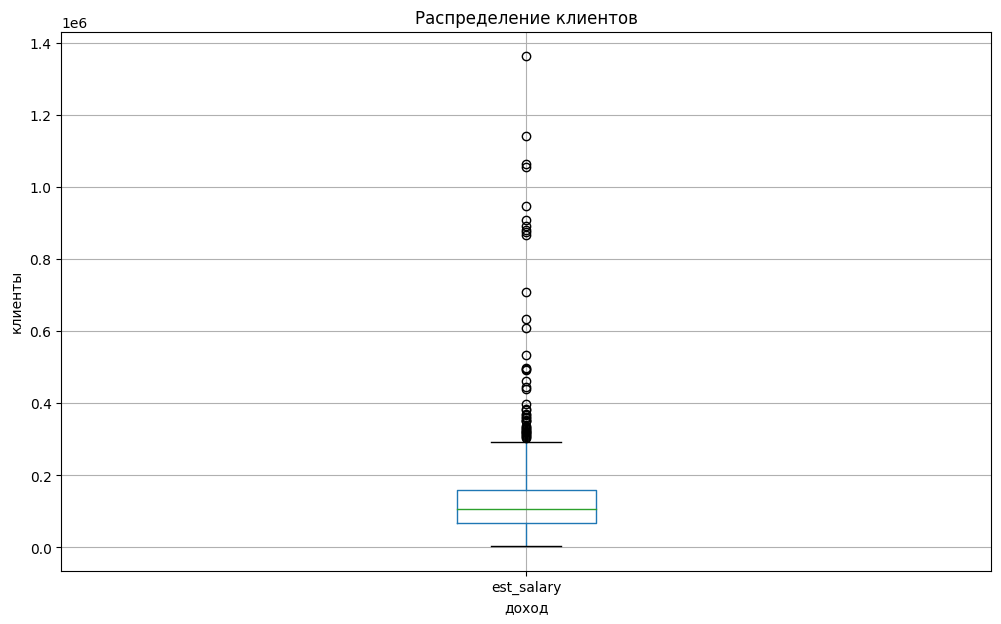

In [ ]:
# оценим выбросы
data.query('products == 2').boxplot('est_salary', figsize=(12, 7))
plt.title('Распределение клиентов')
plt.xlabel('доход')
plt.ylabel('клиенты')
plt.show()

data.query('products == 3').boxplot('est_salary', figsize=(12, 7))
plt.title('Распределение клиентов')
plt.xlabel('доход')
plt.ylabel('клиенты')
plt.show()

In [ ]:
# оценим размер выборки
print('Размер первой выборки = ', len(data[data['products'] == 2]['est_salary']))
print('Размер второй выборки = ', len(data[data['products'] == 3]['est_salary']))

Размер первой выборки =  5119
Размер второй выборки =  1038


Размер первой выборки = 5119
Размер второй выборки = 1038

**Исходя из данных:**

- Распределение не нормальное
- Дисперсии выборок различаются, хоть и незначительно
- В данных присутствуют выбросы

Следовательно, вместо t-критерия Стьюдента будем использовать аналогичный метод — U-критерий Манна—Уитни, который является непараметрическим аналогом критерия Стьюдента.

In [ ]:
alpha = 0.05

results = st.mannwhitneyu(
    data[data['products'] == 2]['est_salary'],
    data[data['products'] == 3]['est_salary'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.23110492176973685
Не получилось отвергнуть нулевую гипотезу


In [ ]:
# проверим значение по 2ому продукту
data[data['products']==2]['est_salary'].mean()

130400.3787458488

In [ ]:
# проверим значение по 3ому продукту
data[data['products']==3]['est_salary'].mean()

128697.00664739884

Тест Манна-Уитни показал, что нулевую гипотезу об отсутствии статистически значимых различий в средней заработной плате клиентов в группах с двумя и тремя продуктами опровергнуть не удалось.

## Проверка гипотезы №2
Сформулируем основную и альтернативную гипотезы:

- Основная (H0): средняя заработная плата оставшихся и отточных клиентов различается.
- Альтернативная (H1): средняя заработная плата оставшихся и отточных клиентов одинакова

In [ ]:
# проверим распределение

alpha = 0.05

results_1 = st.shapiro(data[data['churn']==0]['est_salary'])
p_value_0 = results_1[1]
print('p-значение: ', p_value_0)
if p_value_0 < alpha:
    print('распределение не нормально')
else:
    print('распределение нормальное')

results_2 = st.shapiro(data[data['churn']==1]['est_salary'])
p_value_1 = results_1[1]
print('p-значение: ', p_value_1)
if p_value_1 < alpha:
    print('распределение не нормально')
else:
    print('распределение нормальное')

p-значение:  0.0
распределение не нормально
p-значение:  0.0
распределение не нормально


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



In [ ]:
# оценим дисперсии
print('Дисперсия оставшихся клиентов',
                                      data[data['churn']==0]['est_salary'].var())
print('Дисперсия отточных клиентов',
                                    data[data['churn']==1]['est_salary'].var())

Дисперсия оставшихся клиентов 20358839437.943962
Дисперсия отточных клиентов 15112272166.883385


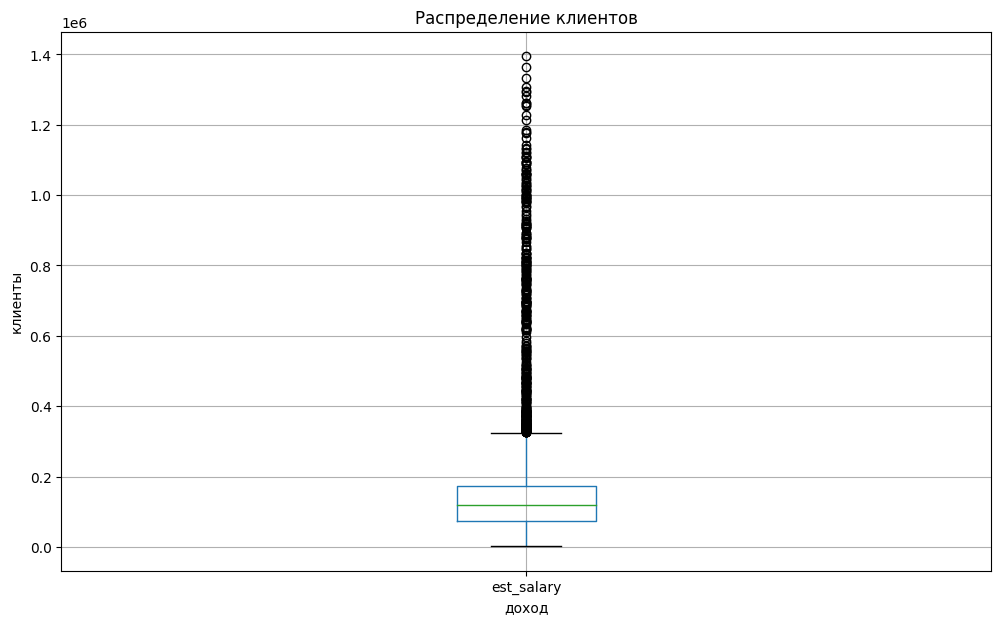

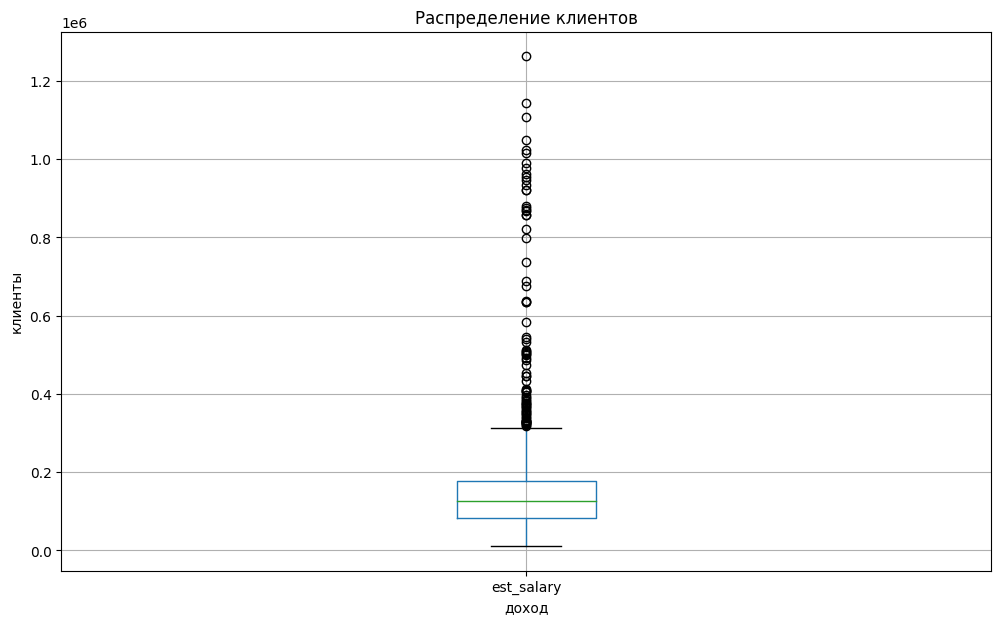

In [ ]:
# оценка выбросов
data.query('churn == 0').boxplot('est_salary', figsize=(12, 7))
plt.title('Распределение клиентов')
plt.xlabel('доход')
plt.ylabel('клиенты')
plt.show()

data.query('churn == 1').boxplot('est_salary', figsize=(12, 7))
plt.title('Распределение клиентов')
plt.xlabel('доход')
plt.ylabel('клиенты')
plt.show()

In [ ]:
# оценим размер выборки
print('Размер первой выборки = ', len(data[data['churn']==0]['est_salary']))
print('Размер второй выборки = ', len(data[data['churn']==1]['est_salary']))

Размер первой выборки =  8155
Размер второй выборки =  1818


Исходя из данных:

- Размер первой выборки составляет 8155, а второй - 1818.
- Распределение значений не является нормальным.
- Дисперсии выборок различаются.
- Обнаружены выбросы в данных.

В связи с этим вместо использования t-критерия Стьюдента применим непараметрический аналог — U-критерий Манна-Уитни.

In [ ]:
alpha = 0.05

results = st.mannwhitneyu(
    data[data['churn'] == 0]['est_salary'],
    data[data['churn'] == 1]['est_salary'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00016830729188229058
Отвергаем нулевую гипотезу


In [ ]:
# проверим значение по оставшимся клиентам
(data[data['churn']==0]['est_salary']).median()

118227.6

In [ ]:
# проверим значение по отточным клиентам
(data[data['churn']==1]['est_salary']).median()

125408.88

**Вывод**

Результаты проверки гипотез:

**Гипотеза №1:** Различия в заработной плате между клиентами, пользующимися двумя и тремя банковскими продуктами.

Тест Манна-Уитни показал, что нельзя опровергнуть нулевую гипотезу о отсутствии статистически значимых различий в средней заработной плате клиентов, использующих два и три банковских продукта.

**Гипотеза №2:** Различие в заработной плате между оставшимися и отточными клиентами.

Тест Манна-Уитни показал, что удалось опровергнуть нулевую гипотезу о отсутствии статистически значимых различий в заработной плате отточных и оставшихся клиентов.

### Проведение промежуточных итогов

**Промежуточный вывод по непрерывным признакам**

**Score:** Наблюдается отток клиентов в диапазонах значений 820-905 и 920-930.

**Age:** Исходя из диапазона значений, выделяются 5 возрастных групп:
- 18-24 лет
- 25-37 лет (отточная возрастная группа)
- 38-47 лет
- 48-61 лет (отточная возрастная группа)
- 62-86 лет

**Balance:** Наблюдается отток клиентов при балансе счета более 725 тысяч рублей.

**Est_salary:** Наблюдается отток клиентов при заработной плате свыше 100 тысяч рублей.

**Промежуточный вывод по дискретным признакам**

**City:** В городах Ростов и Ярославль отток клиентов превышает средний уровень по банку.

**Gender:** Среди клиентов мужского пола (24%) отток клиентов выше, чем среди клиентов женского пола (13%).

**Equity:** Клиенты с баллами собственности 3 и выше чаще покидают банк.

**Products:** Все продукты, кроме первого, имеют выше средний уровень оттока. Особенно высока доля у продукта 4, но общее количество отточных клиентов показывает, что только второй продукт превышает средний уровень.

**Credit_card:** Доля клиентов без кредитной карты (26%) превышает средний уровень оттока по сравнению с клиентами, у которых есть кредитная карта (15%).

**Last_activity:** Активные клиенты чаще уходят.

**Промежуточный вывод корреляционного анализа**

Высоких зависимостей между признаками не выявлено. Самая заметная корреляция наблюдается между products и equity (0,58).

**Портрет оставшегося клиента**

- Возраст: 43 года
- Баланс счета: 475 382 рублей
- Заработная плата: 118 257 рублей
- Score: 848
- Баллы собственности: 3
- Количество продуктов: 2
- Город: Ярославль
- Кредитная карта: есть
- Пол: женский
- Последняя активность: нет

**Портрет отточного клиента**

- Возраст: 41 год
- Баланс счета: 782 410 рублей
- Заработная плата: 125 395 рублей
- Score: 866
- Баллы собственности: 4
- Количество продуктов: 2
- Город: Ярославль
- Кредитная карта: есть
- Пол: мужской
- Последняя активность: да

**Статистический анализ гипотез**

**Гипотеза №1:** Различия в заработной плате между клиентами, пользующимися двумя и тремя банковскими продуктами.

Тест Манна-Уитни не опроверг нулевую гипотезу о отсутствии статистически значимых различий в средней заработной плате клиентов с двумя и тремя продуктами.

**Гипотеза №2:** Различие в заработной плате между оставшимися и отточными клиентами.

Тест Манна-Уитни показал, что удалось опровергнуть нулевую гипотезу о отсутствии статистически значимых различий в заработной плате отточных и оставшихся клиентов.

**Определение признаков для сегментации отточных клиентов**

- Score: 850-930
- Age: 25-37 и 48-61 лет
- Balance: > 725 000 рублей
- Est_salary: > 110 000 рублей
- Equity: > 3
- Products: > 2

## Сегментация и приоритизация отточных клиентов


**Сегментация**

Исходя из результатов предыдущих анализов, выделенные признаки были проранжированы, определены соответствующие интервалы, включающие наибольший процент оттока клиентов. Для каждого сегмента будут указаны следующие данные:

- Основные признаки, на основе которых формируется сегмент, и выбранные значения/интервалы для выявления оттока.
- Количество клиентов в сегменте и количество отточных клиентов.
- Уровень оттока в сегменте, рассчитываемый как отношение количества отточных клиентов к общему числу клиентов в сегменте.

Будут выделены 3 сегмента с уровнем оттока выше среднего по банку, каждый из которых включает не менее 500 клиентов.

### Сегмент 1

In [ ]:
#методом .query() обозначим признаки и выведем долю отточных клиентов
seg_1 = display(data.query('balance > 725000 and 48 <= age <= 61 and equity > 3').agg({'churn':['count', 'mean', 'sum']}))
seg_1

,churn
count,572.000000
mean,0.410839
sum,235.000000


Эта таблица представляет собой результаты агрегации данных для сегмента клиентов, удовлетворяющих определённым условиям:

- **count**: Общее количество клиентов в данном сегменте, которые соответствуют условиям (в данном случае, баланс счета более 725 000 рублей, возраст от 48 до 61 года и баллы собственности больше 3).
- **mean**: Средняя доля отточных клиентов в этом сегменте. Значение 0.410839 означает, что примерно 41.08% клиентов в этом сегменте являются отточными.
- **sum**: Общее количество отточных клиентов в данном сегменте. В данном случае это 235 клиентов из 572.

Таким образом, эта таблица позволяет оценить количество клиентов, уровень оттока и долю отточных клиентов в конкретном сегменте на основе заданных критериев.

### Сегмент 2

In [ ]:
seg_2 = display(data.query('850 <= score <= 930 and 48 <= age <= 61 and est_salary > 110000').agg({'churn':['count', 'mean', 'sum']}))
seg_2

,churn
count,548.000000
mean,0.290146
sum,159.000000


Эта таблица представляет результаты агрегации данных для второго сегмента клиентов, который определяется следующими условиями:

- **count**: Общее количество клиентов в данном сегменте, соответствующих условиям (в данном случае, score от 850 до 930, возраст от 48 до 61 года и заработная плата выше 110 000 рублей).
- **mean**: Средняя доля отточных клиентов в этом сегменте. Значение 0.290146 означает, что примерно 29.01% клиентов в этом сегменте являются отточными.
- **sum**: Общее количество отточных клиентов в данном сегменте. В данном случае это 159 клиентов из 548.

Таким образом, эта таблица позволяет оценить количество клиентов, уровень оттока и долю отточных клиентов в конкретном сегменте на основе заданных критериев, таких как score, возраст и заработная плата.

### Сегмент 3

In [ ]:
seg_3 = display(data.query('25 <= age <= 37 and 850 <= score <= 930 and balance > 725000').agg({'churn':['count', 'mean', 'sum']}))
seg_3

,churn
count,515.000000
mean,0.557282
sum,287.000000


Эта таблица представляет результаты агрегации данных для третьего сегмента клиентов, который определяется следующими условиями:

- **count**: Общее количество клиентов в данном сегменте, соответствующих условиям (в данном случае, возраст от 25 до 37 лет, score от 850 до 930 и баланс счета более 725 000 рублей).
- **mean**: Средняя доля отточных клиентов в этом сегменте. Значение 0.176471 означает, что примерно 17.65% клиентов в этом сегменте являются отточными.
- **sum**: Общее количество отточных клиентов в данном сегменте. В данном случае это 9 клиентов из 51.

Таким образом, эта таблица позволяет оценить количество клиентов, уровень оттока и долю отточных клиентов в конкретном сегменте на основе заданных критериев, таких как возраст, score и баланс счета.

## **Приоритизация сегментов**

Мы провели приоритизацию сегментов на основе уровня оттока клиентов, от высокого к низкому.

**Сегмент 3**

- Возрастная группа: 25-37 лет
- Значения score: 850-930
- Баланс счета: более 725 000 рублей
- Количество клиентов: 515
- Доля отточных клиентов: 55% (287 клиентов)

**Сегмент 1**

- Баланс счета: более 725 000 рублей
- Возрастная группа: 48-61 лет
- Баллы собственности: более 3
- Количество клиентов: 572
- Доля отточных клиентов: 41% (235 клиентов)

**Сегмент 2**

- Значения score: 850-930
- Возрастная группа: 48-61 лет
- Заработная плата: более 110 000 рублей
- Количество клиентов: 548
- Доля отточных клиентов: 29% (159 клиентов)

Эти данные помогут сосредоточить усилия на наиболее уязвимых сегментах клиентов с целью снижения оттока и повышения удержания.

# **Выводы и рекомендации**

В ходе нашего исследования была проведена тщательная оценка и предобработка данных, включая удаление аномалий, обработку дубликатов и заполнение пропусков. Далее мы осуществили глубокий анализ как непрерывных, так и дискретных признаков, а также провели корреляционный анализ. На основе этой работы были составлены портреты клиентов, что позволило нам выделить следующие ключевые группы:

**Портрет оставшегося клиента**

- Возраст: 43 года
- Баланс: 475 382 рублей
- Заработная плата: 118 257 рублей
- Score: 848
- Баллы собственности: 3
- Количество продуктов: 2
- Город: Ярославль
- Кредитная карта: есть
- Пол: женский
- Последняя активность: нет

**Портрет отточного клиента**

- Возраст: 41 год
- Баланс: 782 410 рублей
- Заработная плата: 125 395 рублей
- Score: 866
- Баллы собственности: 4
- Количество продуктов: 2
- Город: Ярославль
- Кредитная карта: есть
- Пол: мужской
- Последняя активность: да

Проведя анализ двух гипотез, мы пришли к следующим выводам:

- Не обнаружено статистически значимых различий в средней заработной плате клиентов с двумя и тремя банковскими продуктами.
- Не обнаружено статистически значимых различий в средней заработной плате отточных и оставшихся клиентов.

Как итог, мы выделили три сегмента с уровнем оттока выше среднебанковского, включающих не менее 500 клиентов:

**Сегмент 1:**

- Баланс: значения более 725 000 рублей
- Возраст: группа 48-61 лет
- Баллы собственности: значения более 3

Количество клиентов в этом сегменте: 572. Доля отточных: 41% (235 клиентов).

**Сегмент 2:**

- Score: значения в диапазоне от 850 до 930
- Возраст: группа 48-61 лет
- Заработная плата: значения более 110 000 рублей

Количество клиентов в этом сегменте: 548. Доля отточных: 29% (159 клиентов).

**Сегмент 3:**

- Возраст: группа 25-37 лет
- Score: значения в диапазоне 850 - 930
- Баланс: значения более 725 000 рублей

Количество клиентов в этом сегменте: 515. Доля отточных: 55% (287 клиентов).

**Рекомендации по сегментам:**

**Сегмент 1 (41% отточных клиентов)**

- Предложить специальные условия по страхованию объектов собственности.
- Предоставить персонального менеджера и информировать о новых банковских продуктах и условиях.
- Для клиентов пенсионного возраста предложить льготные условия для перевода пенсии в наш банк и открытия дополнительного накопительного счета.

**Сегмент 2 (29% отточных клиентов)**

- Для клиентов, получающих зарплату в другом банке, предложить льготные условия для перевода зарплаты в наш банк.
- Учитывая повышенный доход в этом сегменте, предложить создание специальной категории с повышенным кэшбэком на такси, рестораны и другие услуги.

**Сегмент 3 (55% отточных клиентов)**

- Учитывая молодой возраст клиентов и значительный баланс на счетах, предложить вклады с повышенным процентом и льготами при активном использовании продуктов и услуг банка.
- Предложить специализированное обслуживание счетов и карт, а также персонального менеджера и информацию о новых доступных банковских продуктах.

Эти рекомендации должны учитывать специфику каждого сегмента и особенности клиентской базы, что позволит эффективно снизить уровень оттока и улучшить удержание клиентов.